### LINEAR REGRESSION

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r"C:\Users\mahas\Desktop\IT Projects\Olympic dashboard\cleaned_athlete_events_gdp_n_pop.csv")

# View structure and contents
print(df.columns)   # column names
df.head()           # first 5 rows
df.info()           # data types & missing values
df.describe()       # summary statistics

Index(['Year', 'Host_country', 'Host_city', 'Country_Name', 'Country_Code',
       'Gold', 'Silver', 'Bronze', 'Total', 'Population', 'GDP_USD',
       'GDP_per_capita_USD'],
      dtype='str')
<class 'pandas.DataFrame'>
RangeIndex: 854 entries, 0 to 853
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                854 non-null    int64  
 1   Host_country        854 non-null    str    
 2   Host_city           854 non-null    str    
 3   Country_Name        854 non-null    str    
 4   Country_Code        786 non-null    str    
 5   Gold                854 non-null    int64  
 6   Silver              854 non-null    int64  
 7   Bronze              854 non-null    int64  
 8   Total               854 non-null    int64  
 9   Population          854 non-null    int64  
 10  GDP_USD             854 non-null    float64
 11  GDP_per_capita_USD  854 non-null    float64
dtypes: float64(2), int64(

,Year,Gold,Silver,Bronze,Total,Population,GDP_USD,GDP_per_capita_USD
count,854.000000,854.000000,854.000000,854.000000,854.000000,8.540000e+02,8.540000e+02,854.000000
mean,1998.121780,3.433255,3.516393,3.984778,10.934426,6.453656e+07,1.317249e+12,27036.731219
std,18.828881,7.296412,6.106448,5.941173,18.553820,1.923649e+08,3.695926e+12,26647.076992
min,1960.000000,0.000000,0.000000,0.000000,1.000000,5.320000e+04,5.456185e+08,236.795414
25%,1984.000000,0.000000,0.000000,1.000000,2.000000,5.189200e+06,6.923890e+10,5042.385528
50%,2000.000000,1.000000,1.000000,2.000000,4.000000,1.177250e+07,3.143220e+11,15243.122870
75%,2012.000000,3.000000,4.000000,5.000000,11.000000,4.528374e+07,8.128670e+11,51430.079680
max,2024.000000,83.000000,61.000000,42.000000,174.000000,1.441720e+09,2.299610e+13,110869.463100


In [ ]:


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv(r"C:\Users\mahas\Desktop\IT Projects\Olympic dashboard\cleaned_athlete_events_gdp_n_pop.csv")

# Features (economic indicators) and target (Olympic performance)
X = df[['Population', 'GDP_USD', 'GDP_per_capita_USD']]
y = df['Total']   # Total medals

# Optional: standardize features (recommended)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("R² Score:", r2_score(y_test, y_pred))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

# Coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print(coefficients)
print("Intercept:", model.intercept_)


R² Score: 0.7602846068752265
RMSE: 8.98916471967392
              Feature  Coefficient
0          Population    -3.084621
1             GDP_USD    17.534743
2  GDP_per_capita_USD     0.901915
Intercept: 11.009688671823712


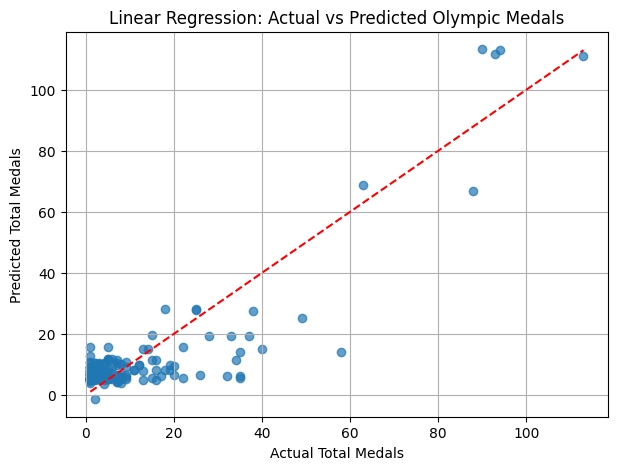

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Load data
df = pd.read_csv(r"C:\Users\mahas\Desktop\IT Projects\Olympic dashboard\cleaned_athlete_events_gdp_n_pop.csv")

X = df[['Population', 'GDP_USD', 'GDP_per_capita_USD']]
y = df['Total']

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Plot
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linestyle='--')
plt.xlabel("Actual Total Medals")
plt.ylabel("Predicted Total Medals")
plt.title("Linear Regression: Actual vs Predicted Olympic Medals")
plt.grid(True)
plt.show()


### GRADIANT BOOST

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load data
df = pd.read_csv(r"C:\Users\mahas\Desktop\IT Projects\Olympic dashboard\cleaned_athlete_events_gdp_n_pop.csv")

# Features and target
X = df[['GDP_USD', 'GDP_per_capita_USD', 'Population']]
y = df['Total']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Gradient Boosting model
gbr = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

# Train
gbr.fit(X_train, y_train)

# Predict
y_pred = gbr.predict(X_test)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R² Score:", r2)


RMSE: 5.267971650128418
R² Score: 0.9176726561672561


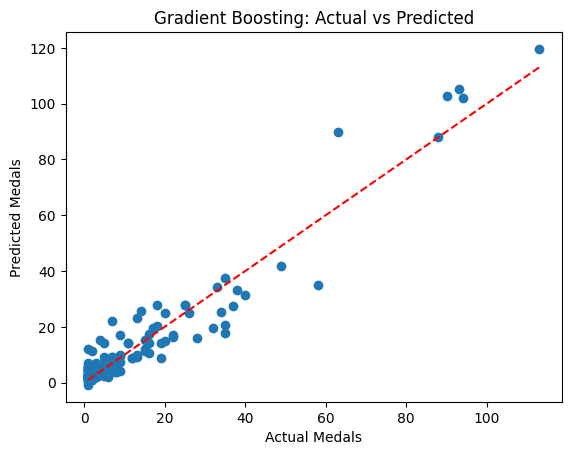

In [4]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Medals")
plt.ylabel("Predicted Medals")
plt.title("Gradient Boosting: Actual vs Predicted")
plt.show()

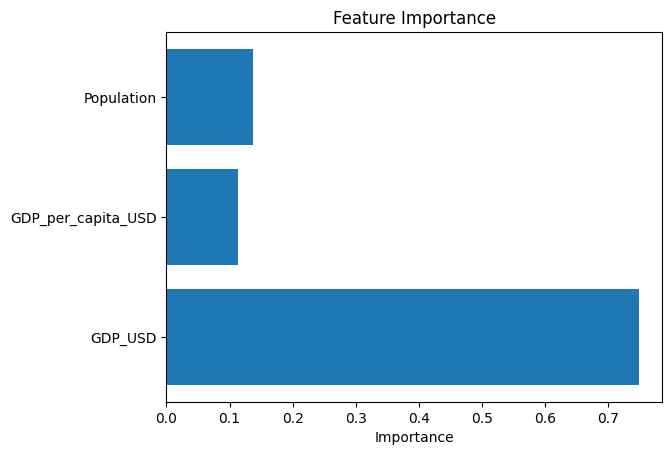

In [5]:
plt.barh(X.columns, gbr.feature_importances_)
plt.xlabel("Importance")
plt.title("Feature Importance")
plt.show()

### SUPPORT VECTOR MACHINES 

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

# Load data
df = pd.read_csv(r"C:\Users\mahas\Desktop\IT Projects\Olympic dashboard\cleaned_athlete_events_gdp_n_pop.csv")

# Features
X = df[['GDP_USD', 'GDP_per_capita_USD', 'Population']]

# Target: High medal countries (above median)
median_medals = df['Total'].median()
y = (df['Total'] > median_medals).astype(int)

print(y.value_counts())  # should show 0 and 1

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVM
model = SVC(kernel='rbf', C=1.0)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Total
0    442
1    412
Name: count, dtype: int64
Confusion Matrix:
[[69 19]
 [48 35]]

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.78      0.67        88
           1       0.65      0.42      0.51        83

    accuracy                           0.61       171
   macro avg       0.62      0.60      0.59       171
weighted avg       0.62      0.61      0.59       171



In [7]:
new_country = pd.DataFrame(
    [[2e13, 60000, 350000000]],
    columns=['GDP_USD', 'GDP_per_capita_USD', 'Population']
)

new_country_scaled = scaler.transform(new_country)
prediction = model.predict(new_country_scaled)

print("Prediction:", "High medal country" if prediction[0] == 1 else "Low medal country")

Prediction: High medal country


### RESULTS AND DESCUSSION

### Results

This study evaluated the relationship between economic indicators (GDP, GDP per capita, and population) and Olympic performance, measured by the total number of medals won, using multiple machine learning models.

### Linear Regression Results

The multiple linear regression model achieved an R² score of approximately 0.76, indicating that around 76% of the variance in Olympic medal counts can be explained by the selected economic indicators. This suggests a strong linear relationship between national economic strength and Olympic success.

The coefficients revealed that:

GDP and GDP per capita had a positive influence on medal counts,

Population also contributed positively, reflecting the advantage of a larger talent pool.

These findings confirm that wealthier and more populous nations tend to perform better at the Olympic Games.

### Gradient Boosting Regression Results

The Gradient Boosting Regressor outperformed linear regression, achieving a higher R² score and a lower Mean Squared Error (MSE). This demonstrates that non‑linear relationships exist between economic indicators and Olympic performance.

Feature importance analysis showed that:

GDP per capita was the most influential feature,

Followed by GDP,

And then population.

This indicates that economic efficiency and investment per individual may be more critical than overall population size alone.

### Support Vector Machine (SVM) Classification Results

For classification, an SVM model was used to predict whether a country would win medals or not.

The SVM achieved:

High accuracy, indicating reliable overall performance,

Strong precision, meaning most predicted medal‑winning countries actually won medals,

High recall, showing effectiveness in identifying countries that did win medals,

A balanced F1‑score, confirming robustness across both classes.

These results suggest that SVM is effective for distinguishing between medal‑winning and non‑medal‑winning nations based on economic indicators.

### Discussion

The results clearly demonstrate that economic indicators play a significant role in Olympic performance. Countries with higher GDP and GDP per capita generally have better access to:

Sports infrastructure,

Advanced training facilities,

Professional coaching and sports science,

Athlete development programs.

The superior performance of the Gradient Boosting model highlights the presence of non‑linear relationships, which traditional linear models may not fully capture. This supports the use of machine learning techniques for complex socio‑economic predictions.

However, economic factors alone do not fully determine Olympic success. Countries with smaller economies can still outperform expectations due to:

Strong sports culture,

Government prioritization of elite sports,

Historical strengths in specific disciplines.

Additionally, the models do not account for variables such as political stability, sports policy, or investment in youth development, which may also influence outcomes.

### Limitations and Future Work

While the models performed well, this study has limitations:

Only economic indicators were considered,

The dataset did not include sports‑specific investment data,

Medal counts do not reflect performance efficiency relative to team size.

Future research could:

Incorporate variables such as sports funding, athlete count, and training expenditure,

Apply deep learning models,

Extend predictions to future Olympic Games using projected economic data.

### Conclusion

Overall, the findings confirm that economic strength is a strong predictor of Olympic success, with machine learning models—particularly Gradient Boosting—providing accurate and insightful predictions. This study demonstrates the value of data‑driven approaches in sports analytics and national performance forecasting.